In [1]:
pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


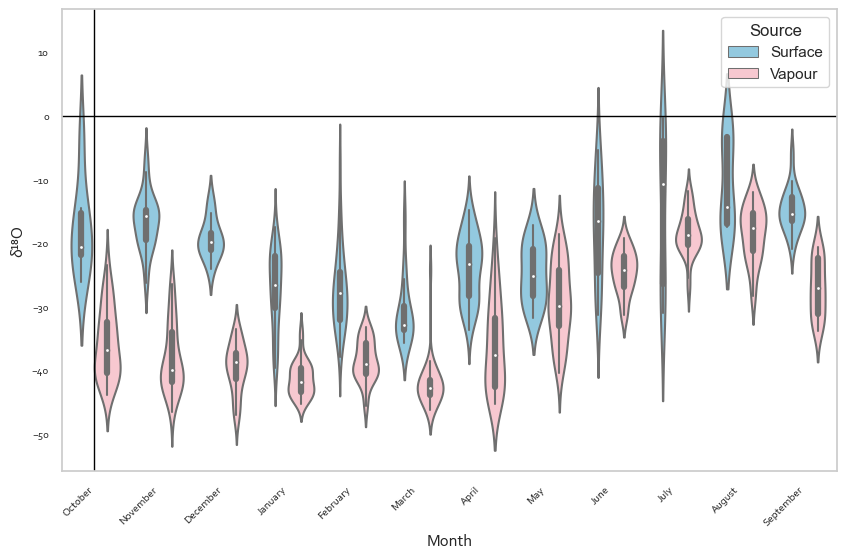

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Box\box_python.xlsx"

# Assuming your data is in the columns "Month", "d18O", "d-excess"
df_surface = pd.read_excel(file_path, sheet_name="Surface")
df_vapour = pd.read_excel(file_path, sheet_name="Vapour")

# Add a 'Source' column to distinguish between Surface and Vapour data
df_surface['Source'] = 'Surface'
df_vapour['Source'] = 'Vapour'

# Concatenate the data
df_combined = pd.concat([df_surface, df_vapour])

# Set the font to Corbel for the plot
sns.set(font='Corbel')

# Set the background color to white
sns.set_style("whitegrid", {'axes.grid': False, 'grid.linestyle': '--'})

# Create a violin plot with light blue color for Surface and pink for Vapour
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="Month", y="d18O", data=df_combined, hue='Source', palette={"Surface": 'skyblue', "Vapour": 'pink'})

# Set labels
plt.xlabel("Month", fontname="Corbel")
plt.ylabel("δ¹⁸O", fontname="Corbel")  # Use δ¹⁸O for the y-axis label

# Add axis lines
plt.axhline(0, color='black', linewidth=1)  # Horizontal line
plt.axvline(0, color='black', linewidth=1)  # Vertical line

# Show ticks for labels on the axes with rotated labels
plt.xticks(rotation=45, ha='right', fontname="Corbel")
plt.yticks(fontname="Corbel")

# Add ticks for values on the y-axis
plt.yticks(fontname="Corbel")

# Add ticks for values on the x-axis
plt.xticks(fontname="Corbel")

# Show ticks for labels on the axes
plt.tick_params(axis='both', which='both', labelsize=8)

# Remove the title
plt.title("")

# Show the legend
plt.legend(title='Source')

# Annotate the number of values on top of each Surface violin
for i, artist in enumerate(ax.artists):
    surface_values = df_surface[df_surface['Month'] == df_combined['Month'].unique()[i]]['d18O'].count()
    plt.text(i, max(ax.collections[i].get_offsets()[:, 1]) + 0.05, f"{surface_values}", ha='center', va='bottom', fontname="Corbel", fontsize=8, color='black')

# Save the plot as a JPEG file with 600 dpi
output_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Box\violin_plot.jpg"
plt.savefig(output_path, dpi=600)

# Show the plot
plt.show()

